# Introduction to Neural Network Classification with TensorFlow



## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Chck out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand, visualise it

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": x[:, 0], "X1": x[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


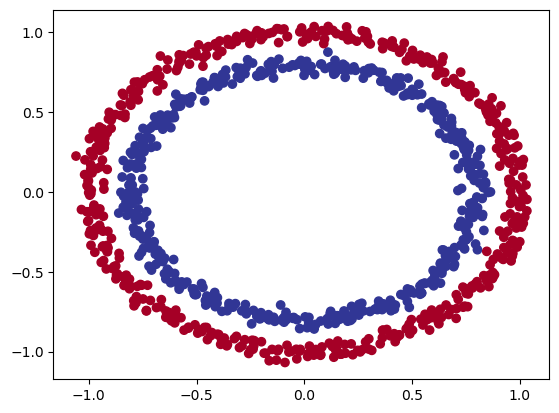

In [5]:
# Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
# Check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(x), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

In [9]:
import tensorflow as tf
tf.__version__
import numpy as np

2023-08-03 02:07:15.337689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 02:07:16.029845: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [10]:
# import tensorflow as tf
# tf.random.set_seed(42)

# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(224, 224, 3)),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(3, activation="softmax"),
# ])

# # 2. Compile the model
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # 3. Fit the model
# model.fit(x, y, epochs=5)

# # 4. Evaluate the model
# model.evalute(x, y)

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(x, y, epochs=5)

2023-08-03 02:07:24.527417: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
32/32 [==============================] - 2s 6ms/step - loss: 5.0902 - accuracy: 0.5520
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.7200 - accuracy: 0.5330
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 4.6193 - accuracy: 0.5340
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 4.5487 - accuracy: 0.5300
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 4.5217 - accuracy: 0.5280


In [12]:
# let's improve our model by training for longer
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [13]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932783126831055, 0.5]

## Improve our model


1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

In [15]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5150


[0.6952987313270569, 0.5149999856948853]

To visualize our model's predictions, let's create a function plot_decision_boundary() which will:
* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different X values.
* Make predictions across the meshgrid.
* Plot the predictions as well as a line between zones (where each unique class falls).

In [17]:
def plot_decision_boundary(model, x, y):
    """Plot the decision boundary created by a model predicting on x.

    Args:
        model (_type_): _description_
        x (_type_): _description_
        y (_type_): _description_
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Create x values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 5ms/step
doing binary classification


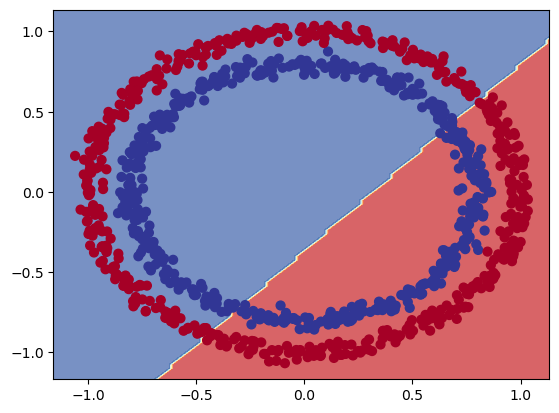

In [18]:
# Check Out the predictions our model is making
plot_decision_boundary(model=model_3, x=x, y=y)

In [19]:
# lets see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our regression data into training and test sets
x_reg_train = x_regression[:150]
y_reg_train = y_regression[:150]
x_reg_test = x_regression[150:]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model with a regression loss function
model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(x_reg_train, axis=1), y_reg_train, epochs=100, verbose=0)

2/2 [==============================] - 0s 6ms/step


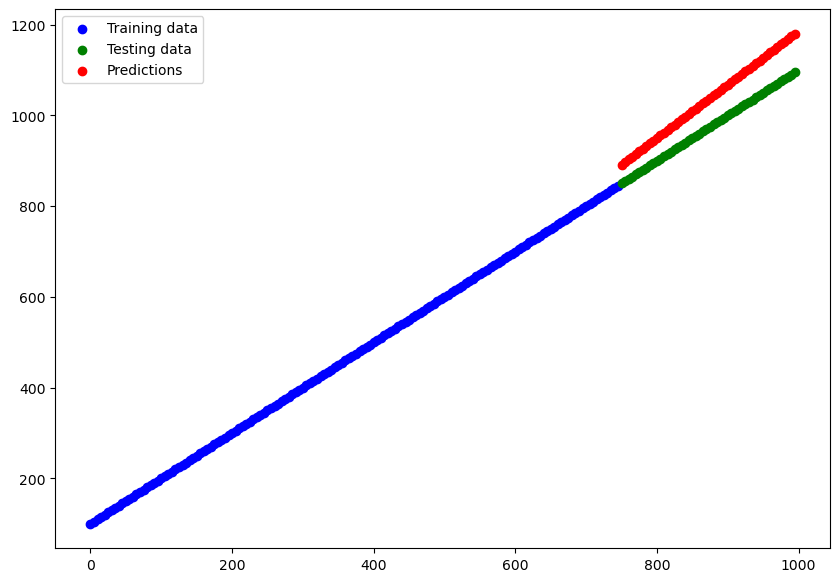

In [21]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(x_reg_test, axis=1))

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(x_reg_test, y_reg_preds.squeeze(), c="r", label="Predictions")
plt.legend();

# The Missing Piece: Non-Linearity

In [22]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.8666 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8397 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8137 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 5.8093 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7852 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 5.7592 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7161 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.6719 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 5.5949 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 5.5759 - accuracy: 0.4800
Epoch 11/

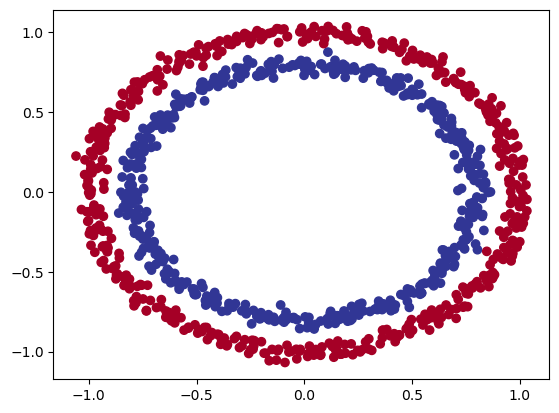

In [23]:
# Check out our data 
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 4ms/step
doing binary classification


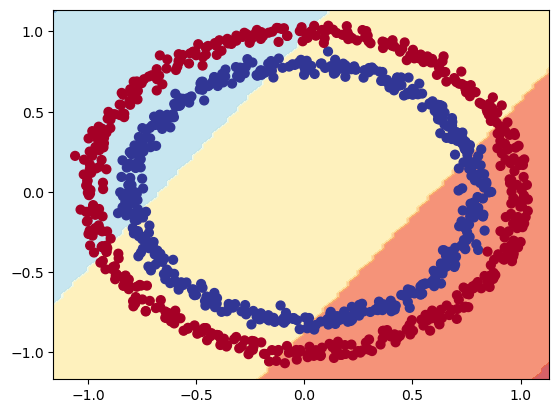

In [24]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, x=x, y=y)

In [50]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(x, y, epochs=100, verbose=0)

In [53]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(x, y, epochs=250, verbose=0)

In [54]:
# Evalaute the model
model_6.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9920


[0.03131328150629997, 0.9919999837875366]

313/313 [==============================] - 1s 3ms/step
doing binary classification


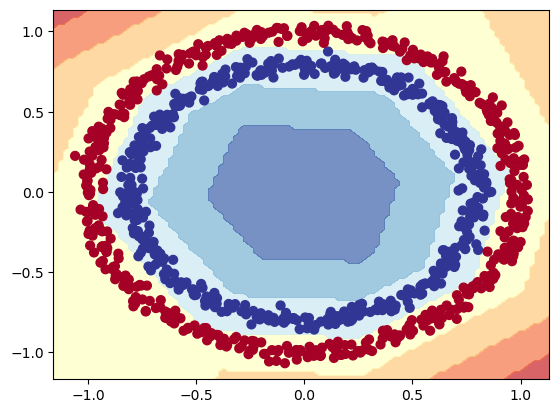

In [55]:
# Visualize
plot_decision_boundary(model=model_6, x=x, y=y)

In [56]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(x, y, epochs=100, verbose=0)

In [57]:
# Evaluate the model
model_7.evaluate(x, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6334 - accuracy: 0.6460


[0.6334460377693176, 0.6460000276565552]

313/313 [==============================] - 1s 3ms/step
doing binary classification


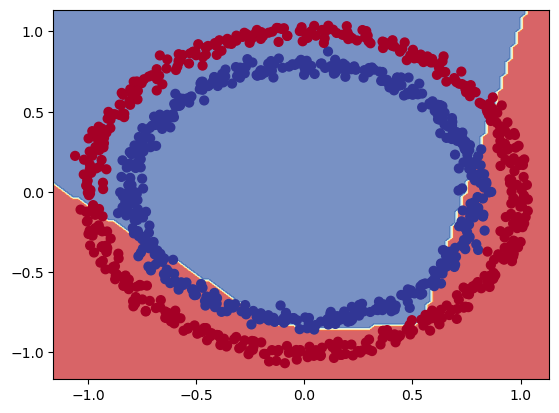

In [58]:
# Visualize
plot_decision_boundary(model=model_7, x=x, y=y)

In [59]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

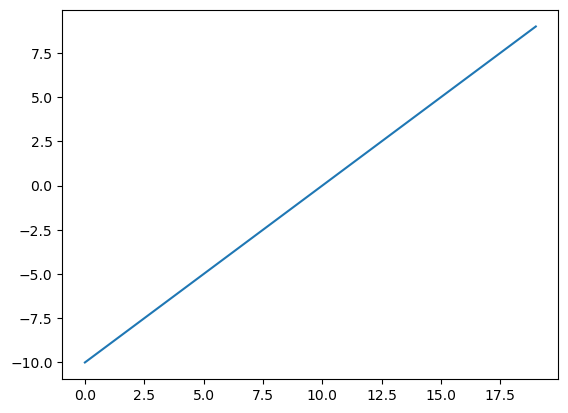

In [60]:
# Visualize our toy tensor
plt.plot(A)

In [61]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

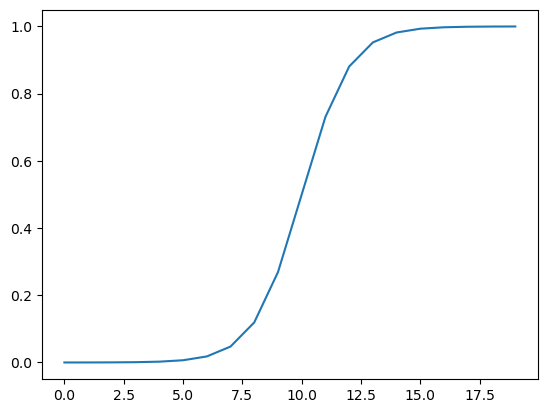

In [62]:
# Plot our tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [63]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

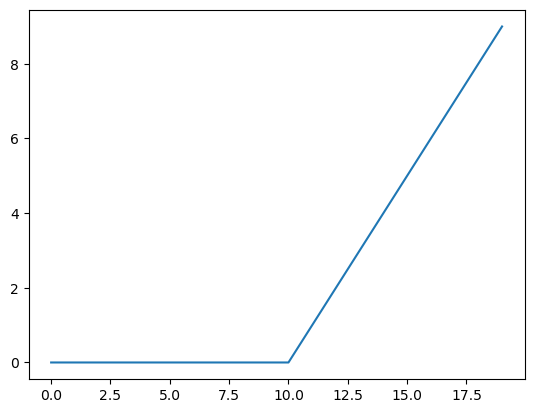

In [64]:
# Plot ReLu-modified tensor
plt.plot(relu(A))

In [65]:
# linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

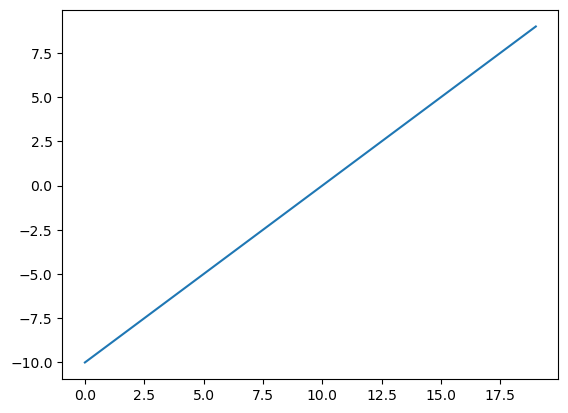

In [66]:
# Plot the linear activation function output
plt.plot(tf.keras.activations.linear(A))

In [67]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and Improving our Classification Model

In [179]:
# Check how many examples we have
len(x)

1000

In [180]:
# Split into train and test sets
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [206]:
# recreate a model to fit on the training data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(x_train, y_train, epochs=100, verbose=0)

In [207]:
# 4. Evaluate the model
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.5525 - accuracy: 0.7200


[0.5525125861167908, 0.7200000286102295]

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


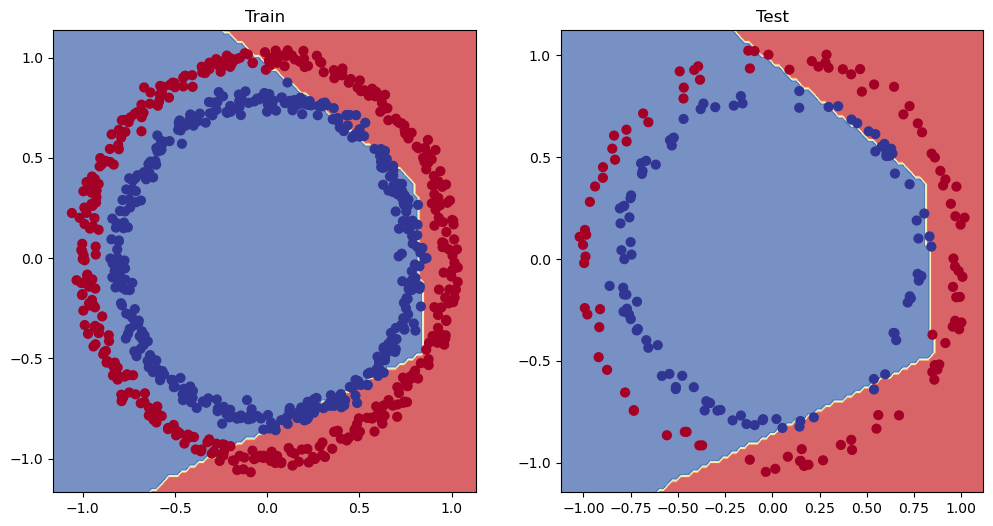

In [208]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_8, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_8, x=x_test, y=y_test)
plt.show()

In [209]:
model_8.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 4)                 12        
                                                                 
 dense_133 (Dense)           (None, 4)                 20        
                                                                 
 dense_134 (Dense)           (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curves

In [210]:
# Convert the history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.692459,0.46625
1,0.690789,0.48375
2,0.689913,0.50625
3,0.689484,0.50000
4,0.689415,0.50750
...,...,...
95,0.585501,0.66500
96,0.584898,0.69375
97,0.582705,0.68375
98,0.581557,0.70125


Text(0.5, 1.0, 'Model_8 loss curves')

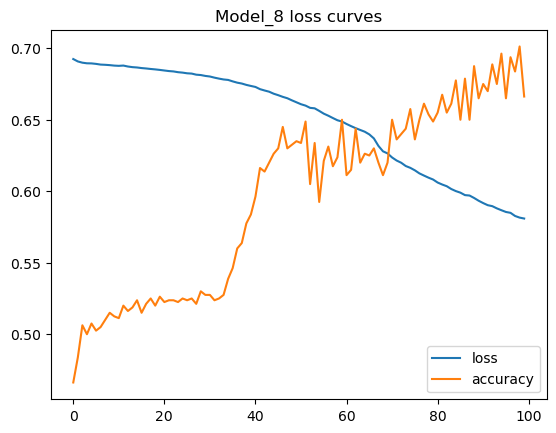

In [211]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the bset learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, however, we're practicing building models here).
* A modified loss curves plot.

In [212]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model (different learning rate)
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)

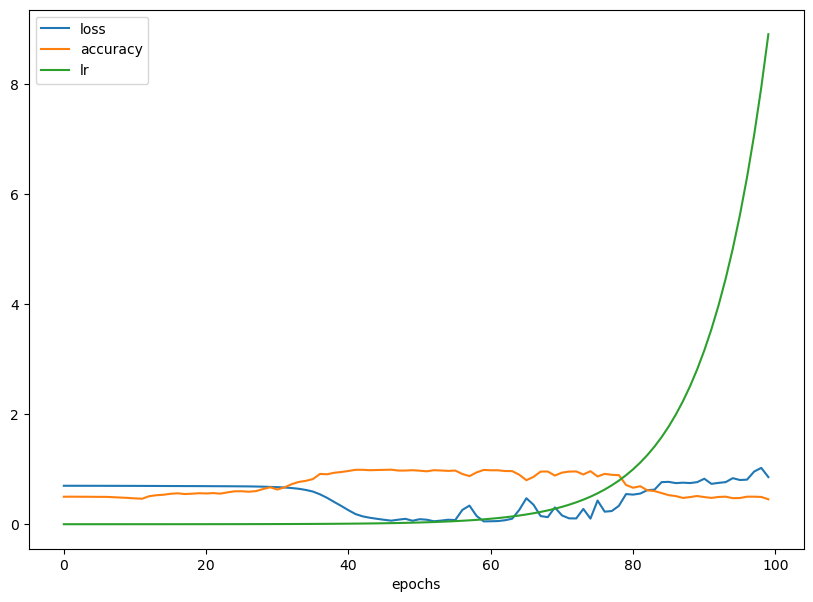

In [213]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs. loss')

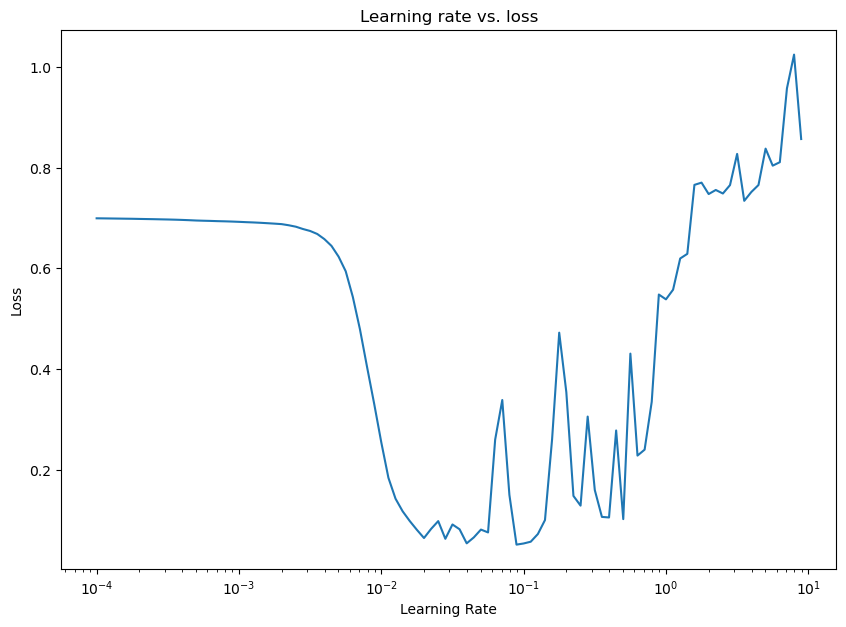

In [214]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. loss')

In [218]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(x_train, y_train, epochs=200, verbose=0)

In [219]:
# Evaluate the model
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.4269 - accuracy: 0.8700


[0.42694854736328125, 0.8700000047683716]

In [220]:
# Evaluate model_8 on the test dataset
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.5525 - accuracy: 0.7200


[0.5525125861167908, 0.7200000286102295]

313/313 [==============================] - 1s 4ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


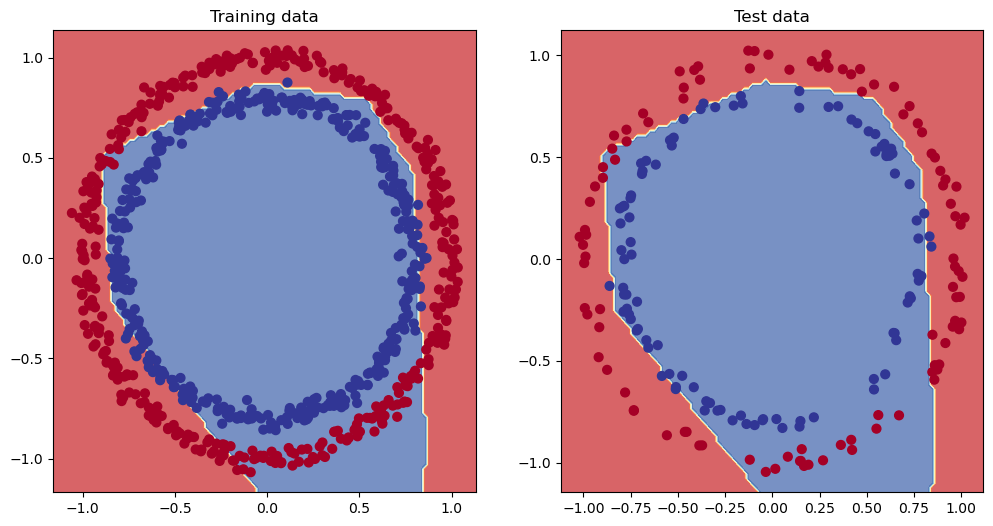

In [222]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model=model_10, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test data")
plot_decision_boundary(model=model_10, x=x_test, y=y_test)
plt.show()